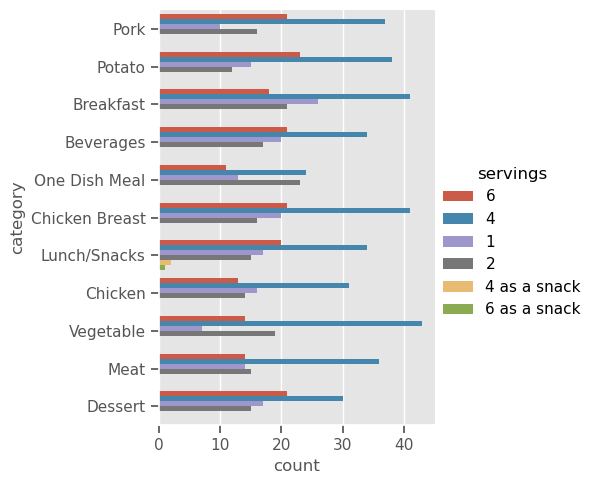

In [ ]:
sns.catplot(
    data=df, y="category", hue="servings",
    kind="count"#, aspect=2, fliersize=2, dodge = True
    #palette = 'Set1',
)

<AxesSubplot: xlabel='recipe', ylabel='carbohydrate'>

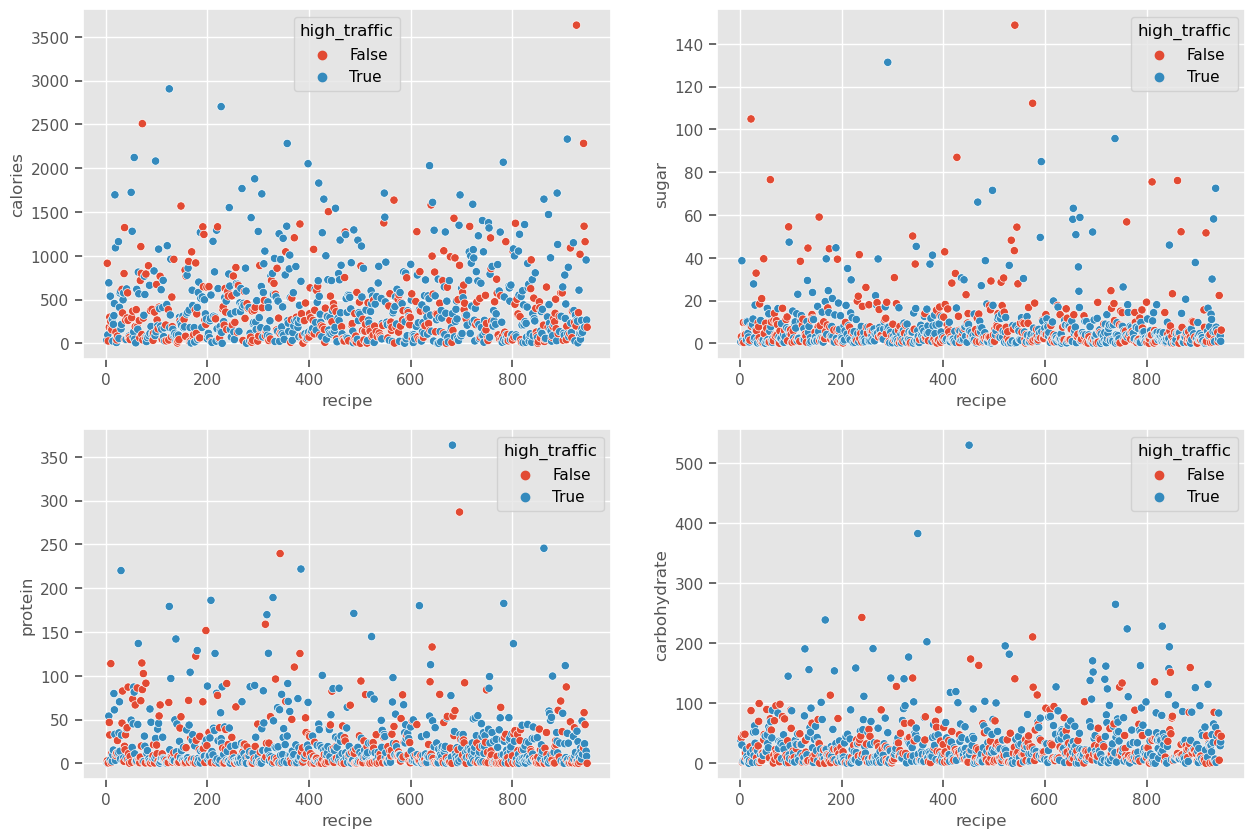

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
sns.scatterplot(data = df, x = 'recipe', y = 'calories', 
                hue = 'high_traffic', ax = axs[0,0])
sns.scatterplot(data = df, x = 'recipe', y = 'sugar', 
                hue = 'high_traffic', ax = axs[0,1])
sns.scatterplot(data = df, x = 'recipe', y = 'protein', 
                hue = 'high_traffic', ax = axs[1,0])
sns.scatterplot(data = df, x = 'recipe', y = 'carbohydrate', hue = 'high_traffic', ax = axs[1,1])


c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


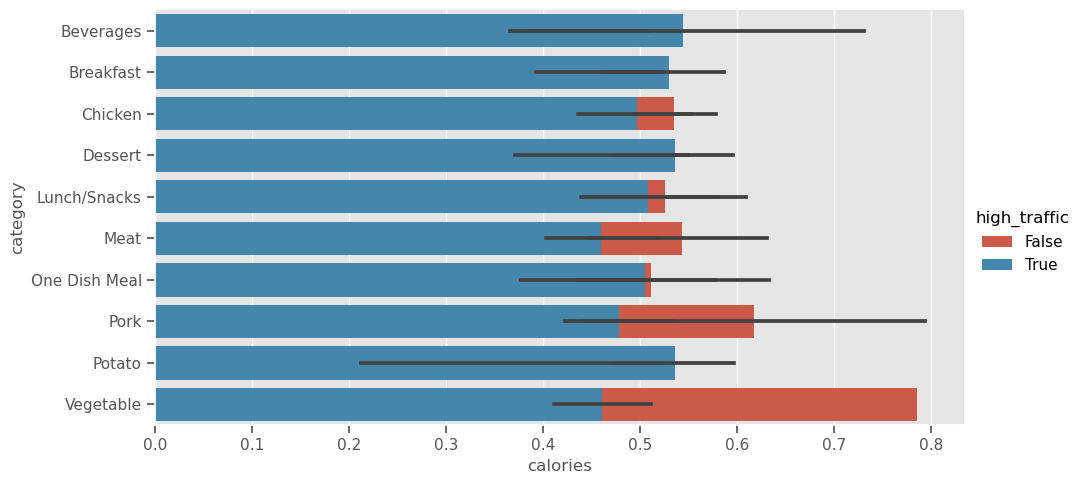

In [ ]:
sns.catplot(
    data=df_train, x="calories", y="category", hue="high_traffic",
    kind="bar", aspect=2, dodge = False
)

<AxesSubplot: title={'center': 'Missing values in percentage'}, ylabel='percentage'>

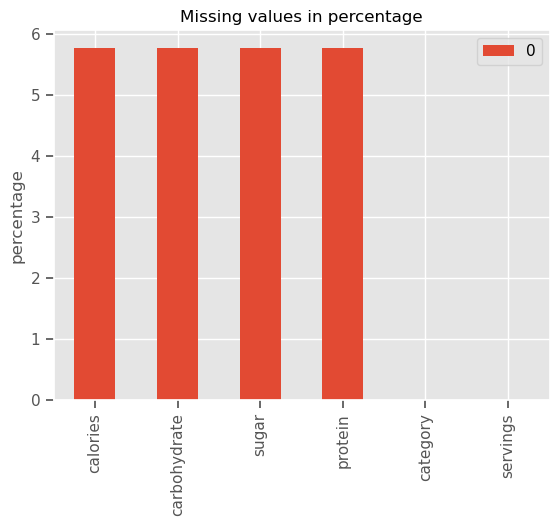

In [ ]:
miss_vals = pd.DataFrame(X_train.isnull().sum() / len(X_train) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')

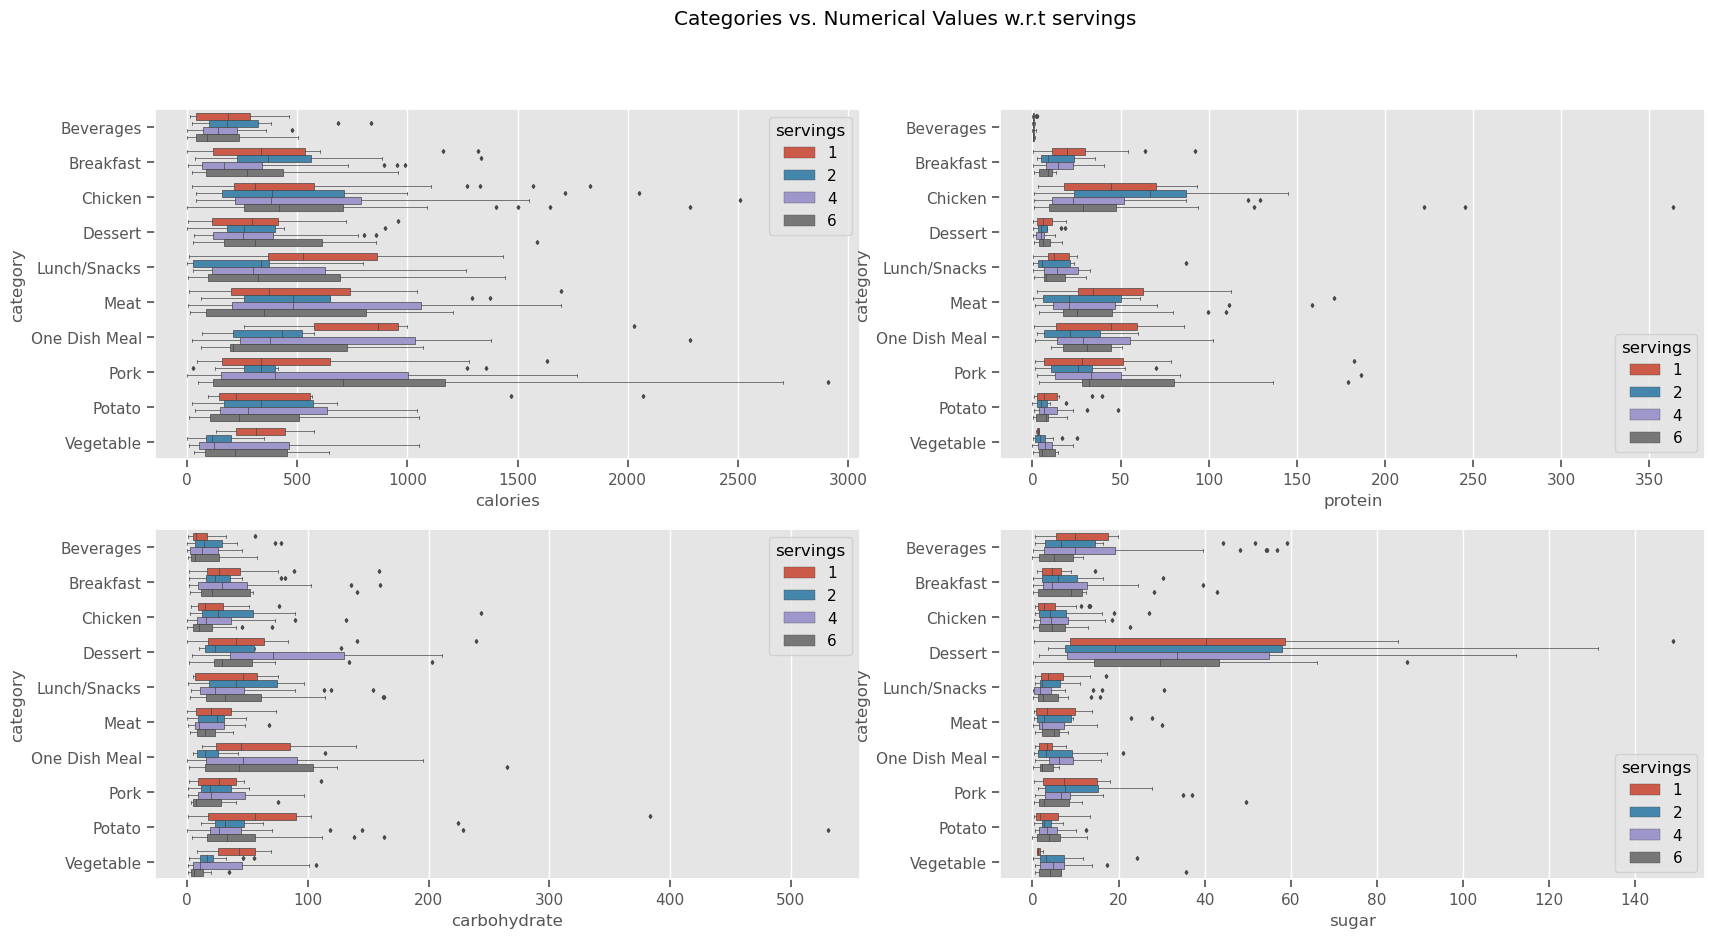

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(20,10))
fig.suptitle('Categories vs. Numerical Values w.r.t servings')

for idx, col in enumerate(feat_cols):
    i, j = divmod(idx, 2)
    sns.boxplot(
        data=X_train, x=col, y="category", hue="servings",
        fliersize=2, dodge = True, linewidth=0.5,
        #palette = 'Set1', kind="box", aspect=2,
        flierprops={"color": 'red'}, ax=axs[i, j]
    )
    
plt.show()

<AxesSubplot: >

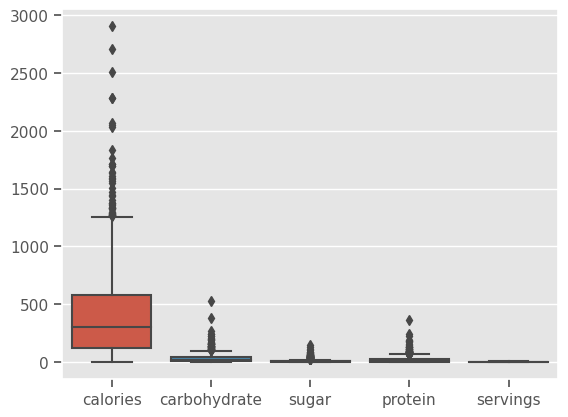

In [ ]:
sns.boxplot(X_train)
#sns.boxplot(normalize(X_train.select_dtypes(include=np.number)))

In [ ]:
X_train_xform = X_train[numeric_cols_xform + cat_oh_cols].copy()

X_train_quant= X_train[numeric_cols_quant + cat_oh_cols].copy()
X_train_quant.rename(columns = dict(zip(numeric_cols_quant, numeric_cols)), inplace=True)

In [ ]:
X_test_xform = X_test[numeric_cols_xform + cat_oh_cols].copy()

X_test_quant = X_test[numeric_cols + cat_oh_cols].copy()

In [ ]:
X_train_xform.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 710 entries, 412 to 102
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories_xform          710 non-null    float64
 1   protein_xform           710 non-null    float64
 2   carbohydrate_xform      710 non-null    float64
 3   sugar_xform             710 non-null    float64
 4   category_Beverages      710 non-null    uint8  
 5   category_Breakfast      710 non-null    uint8  
 6   category_Chicken        710 non-null    uint8  
 7   category_Dessert        710 non-null    uint8  
 8   category_Lunch/Snacks   710 non-null    uint8  
 9   category_Meat           710 non-null    uint8  
 10  category_One Dish Meal  710 non-null    uint8  
 11  category_Pork           710 non-null    uint8  
 12  category_Potato         710 non-null    uint8  
 13  category_Vegetable      710 non-null    uint8  
 14  servings_1              710 non-null    

In [ ]:
# Createmodel_param_grid = {'lda': {
                      #'covariance_estimator': None,
                      #'n_components': None,
                      #'priors': None,
                      #'shrinkage': None,
                      'solver': ['svd', 'lsqr', 'eigen']},
                      #'store_covariance': False,
                      #'tol': 0.0001},
                      #'n_components': [6, 8, 10, 12]},
                      #'learning_decay': [0.75, 0.80, 0.85]},
                    'knn': 
                      {'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                      #'leaf_size': 30,
                      #'metric': 'minkowski',
                      #'metric_params': None,
                      #'n_jobs': None,
                      'n_neighbors': [1, 2, 4, 8, 16, 25, 32],
                      #'p': 2,
                      'weights': ['uniform', 'distance']},
                    'dtree': 
                      {'criterion': ['gini', 'entropy', 'log_loss'], 
                       'ccp_alpha':[0, 0.01, 0.1, 1], 
                       'max_features':['sqrt', 'log2']},
                      #{'ccp_alpha': 0.0,
                      #'class_weight': None,
                      #'criterion': 'gini',
                      #'max_depth': None,
                      #'max_features': None,
                      #'max_leaf_nodes': None,
                      #'min_impurity_decrease': 0.0,
                      #'min_samples_leaf': 1,
                      #'min_samples_split': 2,
                      #'min_weight_fraction_leaf': 0.0,
                      #'random_state': None,
                      #'splitter': 'best'},
                    'natbayes': {'priors': [None], 'var_smoothing': [1e-08, 1e-09, 1e-10]},
                    'svm': 
                      {'C': [0.1,1, 10, 100],
                      #'break_ties': False,
                      #'cache_size': 200,
                      #'class_weight': None,
                      #'coef0': 0.0,
                      #'decision_function_shape': 'ovr',
                      #'degree': 3,
                      'gamma': [1,0.1,0.01,0.001],
                      'kernel': ['rbf', 'poly', 'sigmoid'],
                      #'max_iter': -1,
                      #'probability': False,
                      #'random_state': None,
                      #'shrinking': True,
                      #'tol': 0.001,
                      #'verbose': False
                      },
                    'logreg': 
                      {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      'penalty':['none', 'l1', 'l2', 'elasticnet'],
                      'C':[100, 10, 1.0, 0.1, 0.01], 
                      'max_iter':[1000]},
                      #{'C': 1.0,
                      #'class_weight': None,
                      #'dual': False,
                      #'fit_intercept': True,
                      #'intercept_scaling': 1,
                      #'l1_ratio': None,
                      #'max_iter': [10000],
                      #'multi_class': 'auto',
                      #'n_jobs': None,
                      #'penalty': 'l2',
                      #'random_state': None,
                      #'solver': 'lbfgs',
                      #'tol': 0.0001,
                      #'verbose': 0,
                      #'warm_start': False},
                    'ridge': {'alpha': [0.1, 1],
                      #'class_weight': None,
                      #'copy_X': True,
                      'fit_intercept': [True, False],
                      'max_iter': [10000]},
                      #'positive': False,
                      #'random_state': None,
                      #'solver': 'auto',
                      #'tol': 0.0001},
                    'adatree': {
                       #'estimator__ccp_alpha': 0.01,
                       #'estimator__class_weight': None,
                       #'estimator__criterion': 'gini',
                       #'estimator__max_depth': None,
                       #'estimator__max_features': 'sqrt',
                       #'estimator__max_leaf_nodes': None,
                       #'estimator__min_impurity_decrease': 0.0,
                       #'estimator__min_samples_leaf': 1,
                       #'estimator__min_samples_split': 2,
                       #'estimator__min_weight_fraction_leaf': 0.0,
                       #'estimator__random_state': None,
                       #'estimator__splitter': 'best',
                       #'estimator': [DecisionTreeClassifier(ccp_alpha=0.01, max_features='sqrt')],
                       'learning_rate': np.linspace(0.0, 1.0, num=10), 
                       'n_estimators':[10, 50, 100, 500]},
                      #{'algorithm': 'SAMME.R',
                      #'base_estimator': 'deprecated',
                      #'estimator__ccp_alpha': 0.0,
                      #'estimator__class_weight': None,
                      #'estimator__criterion': 'gini',
                      #'estimator__max_depth': None,
                      #'estimator__max_features': None,
                      #'estimator__max_leaf_nodes': None,
                      #'estimator__min_impurity_decrease': 0.0,
                      #'estimator__min_samples_leaf': 1,
                      #'estimator__min_samples_split': 2,
                      #'estimator__min_weight_fraction_leaf': 0.0,
                      #'estimator__random_state': None,
                      #'estimator__splitter': 'best',
                      #'estimator': DecisionTreeClassifier(),
                      #'learning_rate': 1.0,
                      #'n_estimators': 50,
                      #'random_state': None},
                    'rndtree': {'bootstrap': True,
                      'ccp_alpha': 0.0,
                      'class_weight': None,
                      'criterion': 'gini',
                      'max_depth': None,
                      'max_features': 'sqrt',
                      'max_leaf_nodes': None,
                      'max_samples': None,
                      'min_impurity_decrease': 0.0,
                      'min_samples_leaf': 1,
                      'min_samples_split': 2,
                      'min_weight_fraction_leaf': 0.0,
                      'n_estimators': 100,
                      'n_jobs': None,
                      'oob_score': False,
                      'random_state': None,
                      'verbose': 0,
                      'warm_start': False},
                    'linearsvm': 
                      {'penalty': ['l1', 'l2'],
                      'loss':['squared_hinge'],
                      'C':[100, 10, 1.0, 0.1, 0.01], 
                      'max_iter':[10000]}
                      #{'C': 1.0,
                      #'class_weight': None,
                      #'dual': True,
                      #'fit_intercept': True,
                      #'intercept_scaling': 1,
                      #'loss': 'squared_hinge',
                      #'max_iter': 10000,
                      #'multi_class': 'ovr',
                      #'penalty': 'l2',
                      #'random_state': None,
                      #'tol': 0.0001,
                      #'verbose': 0}
                    } a copy before one-hot encoding for exploration of the target variable
df_train = pd.concat([X_train, y_train], axis=1, join="inner").copy()

## Decision Tree Classifier

In [ ]:
tc = DecisionTreeClassifier()
tc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.57      0.52      0.55        88
        True       0.73      0.77      0.75       149

    accuracy                           0.68       237
   macro avg       0.65      0.65      0.65       237
weighted avg       0.67      0.68      0.68       237

ROC-AUC Score: 0.6472696766320928
Accuracy Score: 0.679324894514768


In [ ]:
tc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
# With Random Hyperparameter tuning
tc = DecisionTreeClassifier()
param_space = {'criterion': ['gini', 'entropy', 'log_loss'], 'ccp_alpha':[0, 0.01, 0.1, 1], 'max_features':['sqrt', 'log2']}
stc = GridSearchCV(tc, param_space, scoring='f1')
search = stc.fit(X_train, y_train)
search.best_params_

{'ccp_alpha': 0.01, 'criterion': 'gini', 'max_features': 'sqrt'}

In [ ]:
y_pred = stc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))
print('Accuracy Score:', accuracy_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.69      0.69      0.69        88
        True       0.82      0.81      0.81       149

    accuracy                           0.77       237
   macro avg       0.75      0.75      0.75       237
weighted avg       0.77      0.77      0.77       237

ROC-AUC Score: 0.7526311775472849
Accuracy Score: 0.7679324894514767


## Adaboost Classifier

In [ ]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features='sqrt', criterion='gini', ccp_alpha=0.01))
abc.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                    max_features='sqrt'))

In [ ]:
y_pred = abc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.67      0.66      0.67        88
        True       0.80      0.81      0.81       149

    accuracy                           0.76       237
   macro avg       0.74      0.74      0.74       237
weighted avg       0.75      0.76      0.75       237

ROC-AUC Score: 0.7355857230018304


In [ ]:
abc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator__ccp_alpha': 0.01,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(ccp_alpha=0.01, max_features='sqrt'),
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
# With Random Hyperparameter tuning
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_features='sqrt', criterion='gini', ccp_alpha=0.01))
param_space = {'learning_rate': np.linspace(0.0, 1.0, num=20) , 'n_estimators':[10, 50, 100, 500]}
sabc = RandomizedSearchCV(abc, param_space, random_state=0)
search = sabc.fit(X_train, y_train)
search.best_params_

{'n_estimators': 10, 'learning_rate': 0.631578947368421}

In [ ]:
y_pred = sabc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.68      0.67      0.67        88
        True       0.81      0.81      0.81       149

    accuracy                           0.76       237
   macro avg       0.74      0.74      0.74       237
weighted avg       0.76      0.76      0.76       237

ROC-AUC Score: 0.7412675411836485


## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_xform, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test_xform)
print('Classification Report: ')
print(classification_report(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.64      0.56      0.60        88
        True       0.76      0.82      0.79       149

    accuracy                           0.72       237
   macro avg       0.70      0.69      0.69       237
weighted avg       0.72      0.72      0.72       237



## Logistic Regression Classifier

In [ ]:
lgc = LogisticRegression(random_state=42, max_iter=500)
cv_score = cross_val_score(lgc, X_train, y_train, cv=10)
lgc.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [ ]:
cv_score.max()

0.8169014084507042

In [ ]:
y_pred = lgc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.69      0.66      0.67        88
        True       0.80      0.83      0.81       149

    accuracy                           0.76       237
   macro avg       0.75      0.74      0.74       237
weighted avg       0.76      0.76      0.76       237

ROC-AUC Score: 0.7422971323978036


In [ ]:
lgc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# With Random Hyperparameter tuning
lgc = LogisticRegression()
param_space = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'l1', 'l2', 'elasticnet'],
               'C':[100, 10, 1.0, 0.1, 0.01], 'max_iter':[1000]}
slgc = RandomizedSearchCV(lgc, param_space, random_state=0)
search = slgc.fit(X_train, y_train)
search.best_params_

c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 1000, 'C': 1.0}

In [ ]:
y_pred = slgc.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.69      0.66      0.67        88
        True       0.80      0.83      0.81       149

    accuracy                           0.76       237
   macro avg       0.75      0.74      0.74       237
weighted avg       0.76      0.76      0.76       237

ROC-AUC Score: 0.7422971323978036


In [ ]:
slgc.best_score_

0.7408450704225353

## Support Vector Classification

In [ ]:
clf = LinearSVC(max_iter = 100000)
clf.fit(X_train, y_train)

LinearSVC(max_iter=100000)

In [ ]:
y_pred = clf.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.69      0.69      0.69        88
        True       0.82      0.81      0.81       149

    accuracy                           0.77       237
   macro avg       0.75      0.75      0.75       237
weighted avg       0.77      0.77      0.77       237

ROC-AUC Score: 0.7526311775472849


In [ ]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# With Random Hyperparameter tuning
clf = LinearSVC()
param_space = {'penalty': ['l1', 'l2'],
               'loss':['squared_hinge'],
               'C':[100, 10, 1.0, 0.1, 0.01], 'max_iter':[500]}
sclf = RandomizedSearchCV(clf, param_space, random_state=0)
search = sclf.fit(X_train, y_train)
search.best_params_

c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\anaconda\lib\site-packages\sklearn\svm\_

{'penalty': 'l2', 'max_iter': 500, 'loss': 'squared_hinge', 'C': 0.1}

In [ ]:
y_pred = sclf.predict(X_test)
print('Classification Report: ')
print(classification_report(y_test,y_pred))
print('ROC-AUC Score:', roc_auc_score(y_test,y_pred))

Classification Report: 
              precision    recall  f1-score   support

       False       0.69      0.69      0.69        88
        True       0.82      0.81      0.81       149

    accuracy                           0.77       237
   macro avg       0.75      0.75      0.75       237
weighted avg       0.77      0.77      0.77       237

ROC-AUC Score: 0.7526311775472849


# TODO
  
Inspect  
[X] Check 'high_traffic' distinct values  
[X] Check balance of 'high_traffic'  
[X] Check for NaN  
[X] Check distro missing values, if < 5%  
[X] Check randomness missing values  
[X] Check for duplicates  
  
Clean  
[X] Convert 'servings' to integer  
  
Preprocess  
[X] Split into Test / Train  
[X] Treat missing values -> Grouped (category, servings) median imputation  
[X] Validate data  
[X] Power Transform (Box Cogg)  
[X] Outlier Treatment  
    [] Robust estimation using all columns, not just numeric  
[] Convert to dummies  
[] Feature Scaling  
[] Normalize  
  
Explore  
[] PCA / Other Feature Importance  
  
Model  
[] Cross Validate  

